  figure.show()



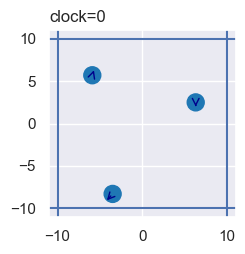

In [1]:
# do multiple collisions really come up?

import numpy as np
from perfect_physics import World, Circle, Wall
from sympy import S
import logging
logging.basicConfig(level=logging.INFO)


def box_world(seed = 0, resolution=10, wall_point = 10, circle_count = 3):

    wall_list = [
        Wall(-wall_point, -wall_point, -wall_point, wall_point),
        Wall(-wall_point, wall_point, wall_point, wall_point),
        Wall(wall_point, wall_point, wall_point, -wall_point),
        Wall(wall_point, -wall_point, -wall_point, -wall_point),
    ]

    rng = np.random.default_rng(seed)

    def random_point(rng, range, resolution):
        return S(rng.integers(-range*resolution, range*resolution,endpoint=True))/resolution

    circle_list = []
    for i in range(circle_count):
        good = False
        while not good:
            good = True
            possible = Circle( 
                x=random_point(rng, wall_point-1, resolution),
                y=random_point(rng, wall_point-1, resolution),
                r=1,
                vx=random_point(rng, 1, resolution),
                vy=random_point(rng, 1, resolution),
                m=1,
            )
            for circle in circle_list:
                if circle.distance(possible) < circle.r + possible.r:
                    good = False
                    break
        circle_list.append(possible)

    world = World(
        circle_list=circle_list,
        wall_list=wall_list,
        rng=rng,
        xlim=(-wall_point - 1, wall_point + 1),
        ylim=(-wall_point - 1, wall_point + 1),
    )
    return world
box_world().show()
pass



Working on 0
tick start: clock=0
circle_id_hint_set=set()
Looking at 22 pairs out of 22.0 possible pairs
tick finish: clock=7/10
tock start. 1 collision(s): [(UUID('794e8a12-f3f9-4c30-a9b1-06c766955989'), UUID('248d2b84-085d-4976-841c-ec96fb494851'))]
tock finish
Working on 1
tick start: clock=7/10
circle_id_hint_set={UUID('fd6825df-750b-4233-86d5-b3b4f8d57c06'), UUID('7ec45194-985f-47dc-bcf1-30b2c8fc14dd'), UUID('d4797589-f114-4572-83cf-68f4223ced2b')}
Looking at 7 pairs out of 22.0 possible pairs
tick finish: clock=11/3
tock start. 1 collision(s): [(UUID('7ec45194-985f-47dc-bcf1-30b2c8fc14dd'), UUID('70e7c129-e8fb-4aa2-bb65-7c89357c226c'))]
tock finish
Working on 2
tick start: clock=11/3
circle_id_hint_set={UUID('fd6825df-750b-4233-86d5-b3b4f8d57c06'), UUID('d4797589-f114-4572-83cf-68f4223ced2b'), UUID('794e8a12-f3f9-4c30-a9b1-06c766955989')}
Looking at 7 pairs out of 22.0 possible pairs
tick finish: clock=55/9
tock start. 1 collision(s): [(UUID('794e8a12-f3f9-4c30-a9b1-06c766955989'

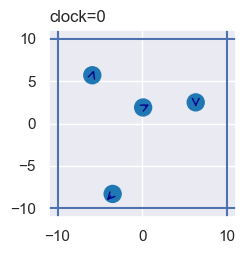

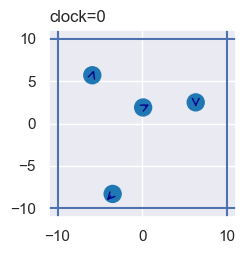

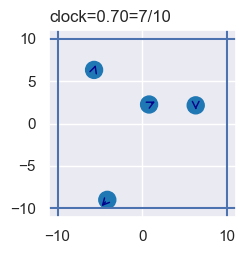

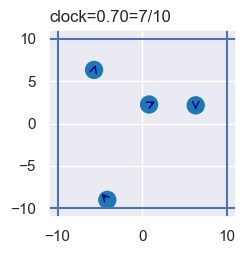

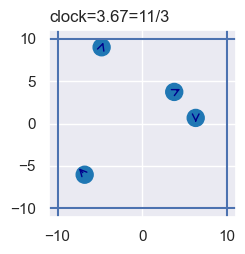

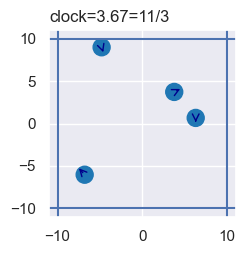

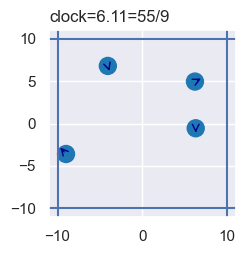

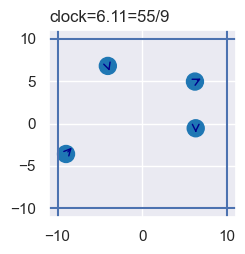

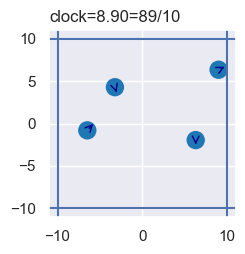

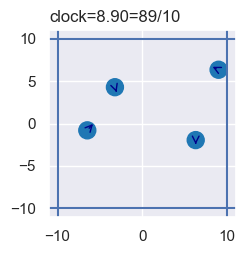

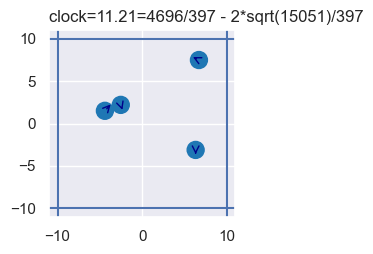

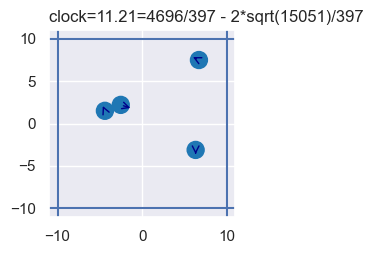

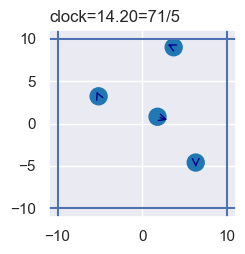

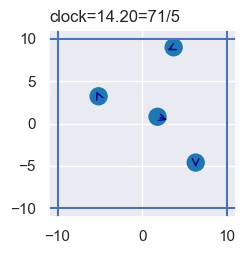

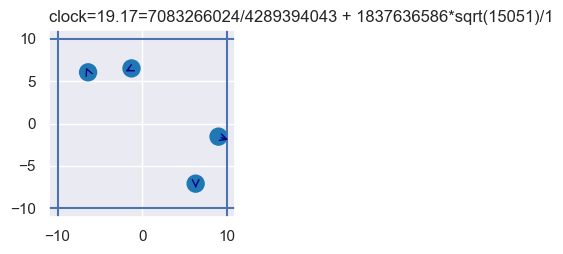

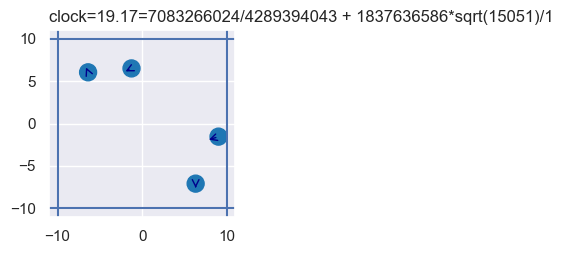

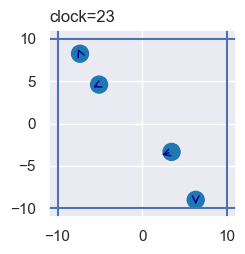

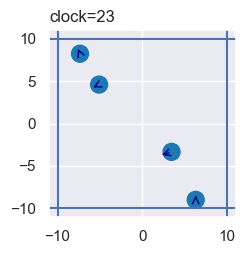

In [4]:
world = box_world(seed=0, wall_point=10, circle_count=4)
world.show()
world.run_in_place(8,show=True)